In [1]:
import numpy as np
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
import random
import seaborn as sns
import tensorflow as tf

2024-05-08 23:25:09.126290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 23:25:09.126406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 23:25:09.264138: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_folder="/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/train"
valid_folder="/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val"
width = 256
height = 256
classes = 13
batch_size = 10
num_of_training_samples = len(os.listdir(train_folder)) 
num_of_testing_samples = len(os.listdir(valid_folder))

In [3]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)
    
    image = img[:,:256]
    mask = img[:,256:]
    
    return image, mask

In [4]:
def getSegmentationArr(mask, classes, width=width, height=height):
    masked=mask.reshape((mask.shape[0]*mask.shape[1],3))
    pred=kmeans.predict(masked)
    pred.shape
    pred=pred.reshape(mask.shape[0],mask.shape[1])
    
    seg_labels = np.zeros((height, width, classes))
    
    for c in range(classes):
        seg_labels[:, :, c] = (pred == c ).astype(int)
    return seg_labels

In [5]:
train_list=os.listdir('../input/cityscapes-image-pairs/cityscapes_data/train')
from tqdm import tqdm
colors=[]

for i in tqdm(range(150)):
    x,y=LoadImage(train_list[i],train_folder)
    colors.append(y.reshape(y.shape[0]*y.shape[1],3))

100%|██████████| 150/150 [00:00<00:00, 185.40it/s]


In [6]:
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))
colors.shape

(9830400, 3)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(colors)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=0)

In [8]:
kmeans.cluster_centers_

array([[128.01373551,  63.76865677, 127.0673482 ],
       [ 81.85165822,   7.42693211,  68.7271176 ],
       [107.56029119, 139.31665687,  39.71655281],
       [236.17797799,  40.26804687, 224.23347366],
       [ 70.73527199,  70.43847933,  68.57493563],
       [  7.92958006,  38.9774773 ,  87.79670385],
       [  4.31577329,   3.05179535,   4.52969021],
       [ 77.78286003, 126.10188378, 170.01420147],
       [201.1394639 ,  26.42022632,  59.26517624],
       [191.4074716 , 154.09764129, 156.20676887],
       [161.50401332, 242.51221716, 158.96771621],
       [  3.11421031,   1.34681356, 138.81549363],
       [215.79467642, 199.26483033,  42.83912948]])

In [9]:
def give_color_to_seg_img(seg, n_classes=classes):
    
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [10]:
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)
        for i in range(gg.shape[0]):
             for u in range(gg.shape[1]):
                if gg[i,u]==0:
                        im[i,u]=np.array( [7.97324365,  100.09284559, 3.3311774 ])# np.array([106.90082868, 139.99479298,  36.44992868]) #dirty-green
                if gg[i,u]==12:
                        im[i,u]= np.array([125.15370551, 128.00683271, 102.70661342]) 
                if gg[i,u]==11:
                        im[i,u]= np.array( [205.10936684, 155.91383531, 158.10853995])
                if gg[i,u]==10:
                        im[i,u]= np.array([202.89782929,  26.40039899,  61.60446492])
                if gg[i,u]==9:
                        im[i,u]= np.array([ 69.55103943,  70.40548991,  69.17557542])#road
                if gg[i,u]==8:
                        im[i,u]=np.array( [127.97324365,  63.09284559, 127.3311774 ])
       
                if gg[i,u]==7:
                        im[i,u]=np.array([ 76.50791694, 126.13882776, 172.87875815]) #sky
                if gg[i,u]==6:
                        im[i,u]=np.array( [157.75659272, 245.35283586, 155.30654771]) #road-dividers
                if gg[i,u]==4:
                        im[i,u]=np.array([ 80.53963208,   6.04446257,  71.14193837]) #buildings
                if gg[i,u]==5:
                        im[i,u]= np.array( [  3.55582649,   3.56494346, 136.37082893])#vehicles
                if gg[i,u]==3:
                        im[i,u]=np.array( [237.59908029,  39.26874128, 225.79570494])
                if gg[i,u]==2:
                        im[i,u]=np.array([  4.1605802 ,   3.27185434,   6.7030066 ])
                if gg[i,u]==1:
                        im[i,u]=np.array( [214.7472683 , 206.44713466,  33.15308545])
                #if gg[i,u]==0:
                 #       im[i,u]=np.array([0,128,0])
        return im

In [11]:
im,mask=LoadImage(train_list[4],train_folder)
c1=getSegmentationArr(mask, classes, width=width, height=height)
#c=give_color_to_seg_img(np.argmax(c1,axis=-1), n_classes=13)
c=addColors(np.argmax(c1,axis=-1))

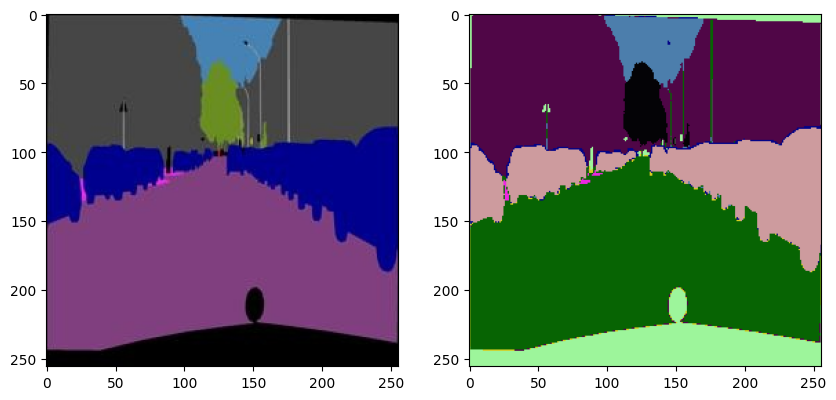

In [12]:
fig,ax=plot.subplots(1,2,figsize=(10,10))
ax[0].imshow(mask)
ax[1].imshow(c)
plot.show()

In [13]:
def DataGenerator(path, batch_size=10, classes=13):
    files = os.listdir(path)
    while True:
        for i in range(0, len(files), batch_size):
            batch_files = files[i : i+batch_size]
            imgs=[]
            segs=[]
            for file in batch_files:
                image, mask = LoadImage(file, path)
                labels = getSegmentationArr(mask, classes)

                imgs.append(image)
                segs.append(labels)

            yield np.array(imgs), np.array(segs)

In [14]:
train_gen = DataGenerator(train_folder, batch_size=batch_size)
val_gen = DataGenerator(valid_folder, batch_size=batch_size)

In [15]:
imgs, segs = next(train_gen)
imgs.shape, segs.shape

((10, 256, 256, 3), (10, 256, 256, 13))

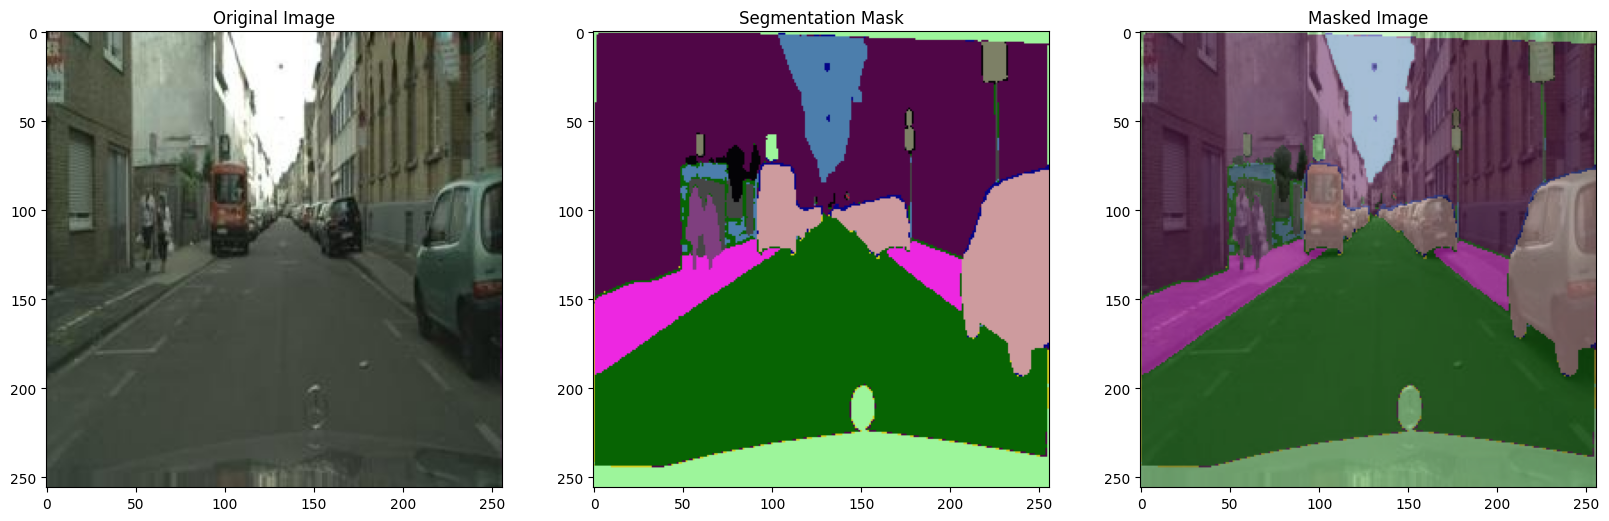

In [16]:
image = imgs[7]
mask = addColors(np.argmax(segs[7], axis=-1))
masked_image = cv2.addWeighted(image, 0.5, mask,0.5, 0)

fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(mask)
axs[1].set_title('Segmentation Mask')
#predimg = cv2.addWeighted(imgs[i]/255, 0.6, _p, 0.4, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [17]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

Basic SegNet arhcitecture

FCN

DeepLabV3

In [18]:
def segnet2(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    #step1
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1=BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    #step2
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2=BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2=BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    #step3
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    #step4
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4=BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    #step5
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    #step6
    up6 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge6 = concatenate([conv5,up6], axis = 3)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6=BatchNormalization()(conv6)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6=BatchNormalization()(conv6)
    
    #step7
    up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv4,up7], axis = 3)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7=BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7=BatchNormalization()(conv7)
    
    #step8
    up8 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv3,up8], axis = 3)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8=BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8=BatchNormalization()(conv8)

    #step9
    up9 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv2,up9], axis = 3)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9=BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9=BatchNormalization()(conv9)
    
    #step10   
    up10 = Conv2D(64,3,activation='relu',padding='same',kernel_initializer = 'he_normal')(UpSampling2D(size=(2,2))(conv9))
    merge10 = concatenate([conv1,up10],axis=3)
    conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
    conv10=BatchNormalization()(conv10)
    conv10 = Conv2D(13, 1, activation = 'softmax')(conv10)
    conv10=BatchNormalization()(conv10)


    model = Model(inputs,conv10)
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
             loss="categorical_crossentropy",
             metrics=["accuracy"])    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model    


In [19]:
segnet=segnet2(pretrained_weights = None,input_size = (256,256,3))
segnet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_6[0][0]  

 Total params: 73,614,529 (280.82 MB)

 Trainable params: 73,594,151 (280.74 MB)

 Non-trainable params: 20,378 (79.60 KB)

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history_sn = segnet.fit(train_gen, epochs=30, steps_per_epoch=num_of_training_samples//batch_size,
                       validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size,
                   callbacks=[early_stop,reduce_lr])

Epoch 1/30


2024-05-08 23:27:02.334928: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.12757, expected 2.546
2024-05-08 23:27:02.334995: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.46799, expected 3.88642
2024-05-08 23:27:02.335004: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.45578, expected 3.87421
2024-05-08 23:27:02.335011: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 4.06319, expected 3.48162
2024-05-08 23:27:02.335019: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 4.78862, expected 4.20705
2024-05-08 23:27:02.335027: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 4.60951, expected 4.02794
2024-05-08 23:27:02.335047: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 3.90975, expected 3.32818
2024-05-08 23:27:02.335058: E external/local_xla/xla/se

296/297 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.0652 - loss: nan

2024-05-08 23:29:51.732164: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65364: 2.53678, expected 2.17699
2024-05-08 23:29:51.732225: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65380: 2.56388, expected 2.20409
2024-05-08 23:29:51.732240: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65381: 2.54569, expected 2.1859
2024-05-08 23:29:51.732255: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65482: 2.57729, expected 2.2175
2024-05-08 23:29:51.732681: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131072: 3.63821, expected 2.67835
2024-05-08 23:29:51.732725: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131073: 5.0582, expected 4.09834
2024-05-08 23:29:51.732756: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131074: 5.50194, expected 4.54208
2024-05-08 23:29:51.732768:

297/297 ━━━━━━━━━━━━━━━━━━━━ 238s 549ms/step - accuracy: 0.0649 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 2/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 120s 403ms/step - accuracy: 0.0060 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 3/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 119s 403ms/step - accuracy: 0.0060 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 4/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 119s 402ms/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 5/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 119s 402ms/step - accuracy: 0.0062 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 6/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 119s 402ms/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 1.0000e-04


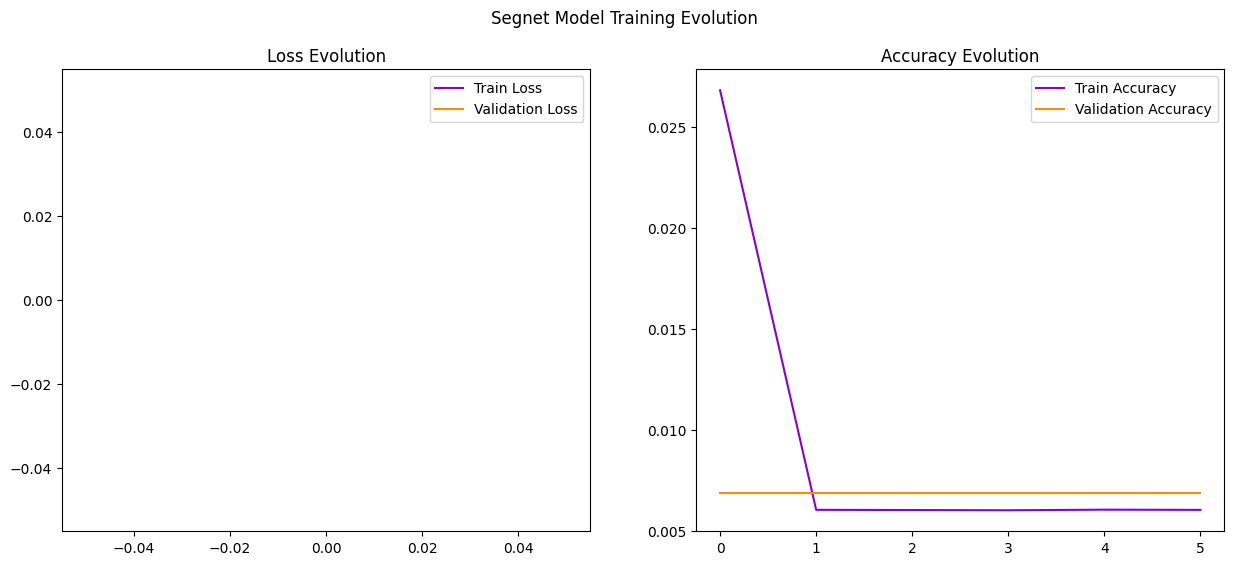

In [21]:
# Plotting the training and validation loss
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history_sn.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history_sn.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_sn.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history_sn.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('Segnet Model Training Evolution')
plt.show()

In [22]:
m='105.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

(1, 256, 256, 3)

In [23]:
r=segnet.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))

2024-05-08 23:40:41.783877: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.86272, expected 2.0465
2024-05-08 23:40:41.783944: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.04967, expected 3.23345
2024-05-08 23:40:41.783959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.4326, expected 3.61638
2024-05-08 23:40:41.783983: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.46868, expected 4.65247
2024-05-08 23:40:41.784001: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.37814, expected 4.56193
2024-05-08 23:40:41.784012: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.18374, expected 4.36753
2024-05-08 23:40:41.784023: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.54872, expected 4.7325
2024-05-08 23:40:41.784034: E external/local_xla/xla/servi

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


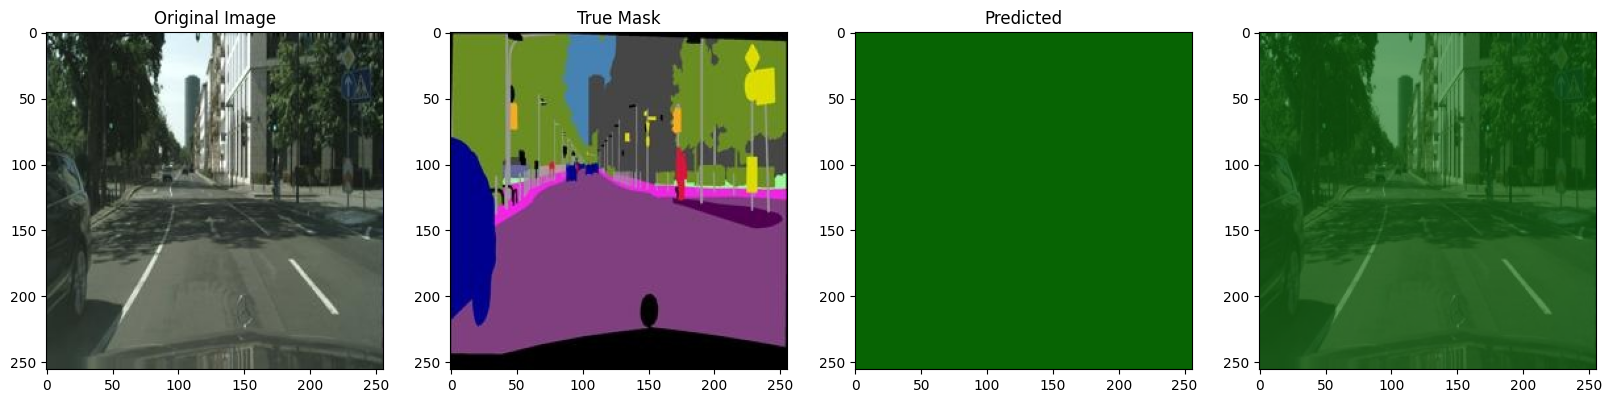

In [24]:
fig, axs = plot.subplots(1, 4, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(tru)
axs[1].set_title('True Mask')
axs[2].imshow(s)
axs[2].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.4,s,0.6, 0)
axs[3].imshow(masked_image)
plot.show()

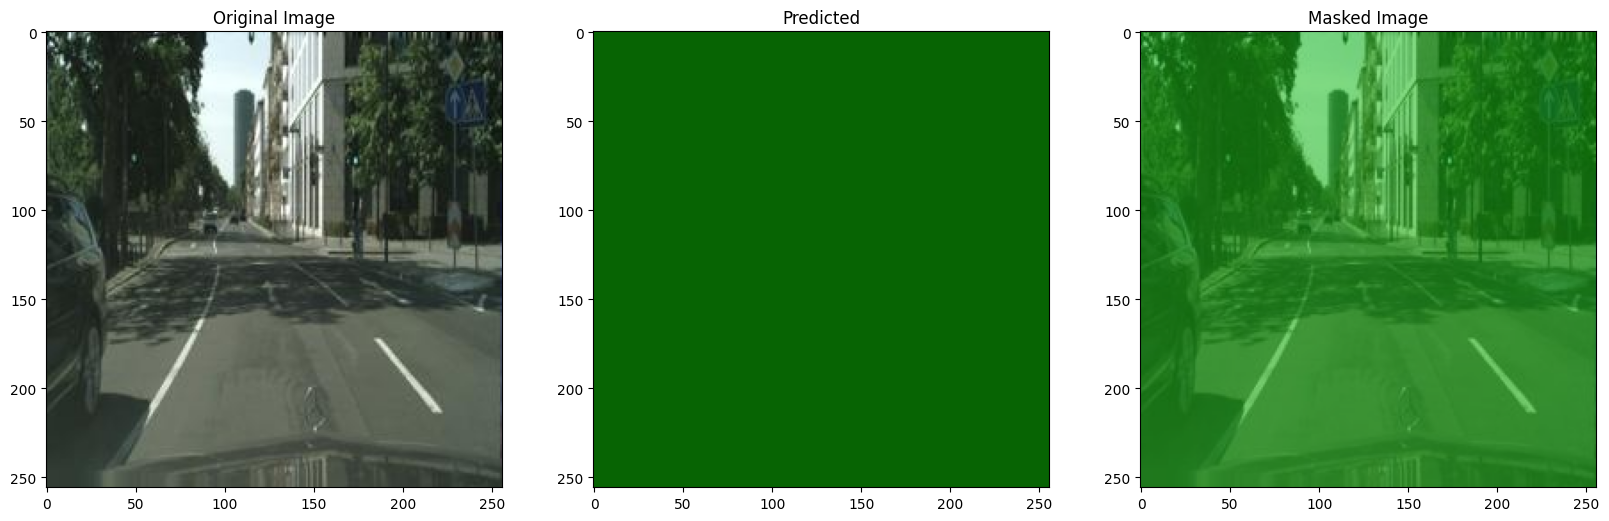

In [25]:
fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(s)
axs[1].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.5,s,0.9, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [26]:
def conv_block(inputs=None, n_filters=32, kernel_size = 3, dropout_prob = 0, max_pooling=True):
    
    conv = Conv2D(n_filters, # Number of filters
                  kernel_size = 3, # Kernel size   
                  activation = 'relu',
                  padding = 'same',
                  kernel_initializer = 'he_normal')(inputs)
    
    conv = Conv2D(n_filters, # Number of filters
                  kernel_size = 3,   # Kernel size
                  activation = 'relu',
                  padding = 'same',
                  kernel_initializer = 'he_normal')(conv)
    
    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
        
    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        next_layer = MaxPooling2D(pool_size = (2,2))(conv)
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

def upsampling_block(expansive_input, contractive_input, n_filters=32, kernel_size = 3):
    
    up = Conv2DTranspose(
                 n_filters,    # number of filters
                 kernel_size = kernel_size,    # Kernel size
                 strides = (2,2),
                 padding = 'same')(expansive_input)
    
    # Merge the previous output and the contractive_input
    merge = concatenate([up, contractive_input], axis=3)
    
    conv = Conv2D(n_filters,   # Number of filters
                 kernel_size = (3,3),     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(merge)
    conv = Conv2D(n_filters,  # Number of filters
                 kernel_size = (3,3),   # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(conv)
    
    return conv

In [27]:
def create_unet_model(image_shape=(256,256,3), n_filters=64, kernel_size=3, n_classes=13):

    inputs = Input(image_shape)

    # Contracting Path (encoding)
    cblock1 = conv_block(inputs, n_filters, kernel_size)
    cblock2 = conv_block(cblock1[0], n_filters * 2, kernel_size)
    cblock3 = conv_block(cblock2[0], n_filters * 4, kernel_size, dropout_prob = 0.3)
    cblock4 = conv_block(cblock3[0], n_filters * 8, kernel_size, dropout_prob = 0.3) # Include a dropout_prob of 0.3 for this layer
    cblock5 = conv_block(cblock4[0], n_filters * 16, kernel_size, dropout_prob = 0.3, max_pooling=False) 

    # Expanding Path (decoding)
    # Add the first upsampling_block.

    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8, kernel_size)
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4, kernel_size)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2, kernel_size)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters, kernel_size)

    conv9 = Conv2D(n_filters,
                 kernel_size = kernel_size,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    # Add a Conv2D layer with n_classes filter, kernel size of 1 and a 'same' padding
    conv10 = Conv2D(n_classes, kernel_size = 1, padding='same')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    
    return model

In [28]:
custom_unet=create_unet_model()
custom_unet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [29]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history_cust_unet = custom_unet.fit(train_gen, epochs=30, steps_per_epoch=num_of_training_samples//batch_size,
                       validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size,
                   callbacks=[early_stop,reduce_lr])

Epoch 1/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 129s 370ms/step - accuracy: 0.0820 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 0.0010
Epoch 2/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 96s 324ms/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 0.0010
Epoch 3/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 96s 322ms/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 0.0010
Epoch 4/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 95s 319ms/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 0.0010
Epoch 5/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 93s 315ms/step - accuracy: 0.0060 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 0.0010
Epoch 6/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 93s 314ms/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0069 - val_loss: nan - learning_rate: 0.0010


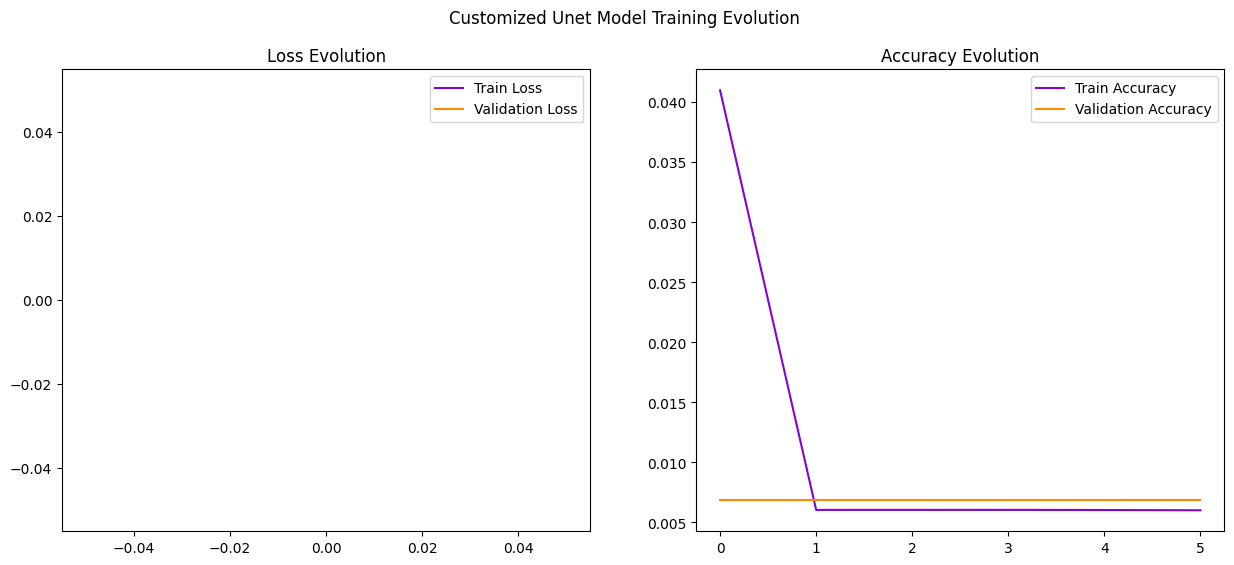

In [30]:
# Plotting the training and validation loss
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history_cust_unet.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history_cust_unet.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cust_unet.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history_cust_unet.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('Customized Unet Model Training Evolution')
plt.show()

In [31]:
m='105.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

(1, 256, 256, 3)

In [32]:
r=custom_unet.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step


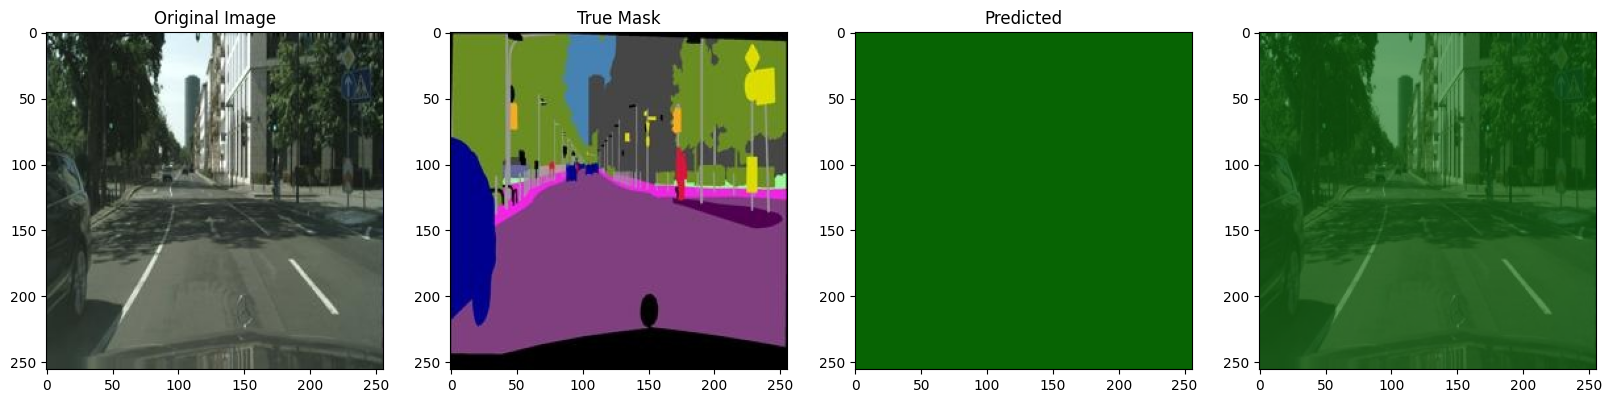

In [33]:
fig, axs = plot.subplots(1, 4, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(tru)
axs[1].set_title('True Mask')
axs[2].imshow(s)
axs[2].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.4,s,0.6, 0)
axs[3].imshow(masked_image)
plot.show()

DeeplabV3 with Mobilenetv2 as backbone

In [34]:

from tensorflow.keras.applications import MobileNetV2
def aspp(input):
    shape = input.shape
    y_pool = AveragePooling2D(pool_size = (shape[1], shape[2]))(input)
    y_pool = Conv2D(filters=256, padding='same', use_bias=False, kernel_size=1)(y_pool)
    y_pool = BatchNormalization()(y_pool)
    y_pool = Activation("relu")(y_pool)
    y_pool = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y_pool)

    out_1 = Conv2D(filters=256, padding='same', dilation_rate = 1, use_bias=False, kernel_size=1)(input)
    out_1 = BatchNormalization()(out_1)
    out_1 = Activation("relu")(out_1)

    out_6 = Conv2D(filters=256, padding='same', dilation_rate = 6, use_bias=False, kernel_size=1)(input)
    out_6 = BatchNormalization()(out_6)
    out_6 = Activation("relu")(out_6)

    out_12 = Conv2D(filters=256, padding='same', dilation_rate = 12, use_bias=False, kernel_size=1)(input)
    out_12 = BatchNormalization()(out_12)
    out_12 = Activation("relu")(out_12)

    out_18 = Conv2D(filters=256, padding='same', dilation_rate = 18, use_bias=False, kernel_size=1)(input)
    out_18 = BatchNormalization()(out_18)
    out_18 = Activation("relu")(out_18)

    y = Concatenate()([y_pool, out_1, out_6, out_12, out_18])
    y = Conv2D(filters=256, padding='same', dilation_rate = 1, use_bias=False, kernel_size=1)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def DeeplabV3_mn(image_size=(256, 256, 3), num_classes=13):

    inputs = Input(image_size)

    mobilenetv2 = MobileNetV2(weights="imagenet", include_top=False, input_tensor=inputs)


    # pretrained Resnet50 output
#     x1 = resnet50.get_layer("conv4_block6_out").output
    x1 = mobilenetv2.get_layer("block_12_add").output 
    x1 = aspp(x1)
    x1 = UpSampling2D((4, 4), interpolation="bilinear")(x1)

    # low level features
#     x2 = resnet50.get_layer("conv2_block2_out").output
    x2 = resnet50.get_layer("conv2_block3_2_relu").output
    x2 = Conv2D(filters=48, padding='same', use_bias=False, kernel_size=1)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)

    x = Concatenate()([x1, x2])

    x = Conv2D(filters=256, padding='same', activation='relu', use_bias=False, kernel_size=3)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(filters=256, padding='same', activation='relu', use_bias=False, kernel_size=3)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = UpSampling2D((4, 4), interpolation="bilinear")(x)

    # output
    x = Conv2D(num_classes, kernel_size=(1, 1), name="output_layer", padding="same")(x)
    x = Activation('softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [35]:
deeplab_mn_model=DeeplabV3_mn()

/tmp/ipykernel_82/1232982617.py:37: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2 = MobileNetV2(weights="imagenet", include_top=False, input_tensor=inputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'resnet50' is not defined

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=10, verbose=1, min_lr = 1e-6)

history_deeplab_mn = deeplab_mn_model.fit(train_gen, 
                    validation_data = val_gen, 
                    epochs = 30,
                    steps_per_epoch=num_of_training_samples//batch_size,
                    validation_steps=num_of_testing_samples//batch_size,
                    callbacks=[early_stop, reduce_lr])

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history_deeplab_mn.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history_deeplab_mn.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_deeplab_mn.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history_deeplab_mn.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('DeepLab3v3 + MobilenetV2 Model Training Evolution')
plt.show()

In [ ]:
m='105.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

In [ ]:
r=deeplab_mn_model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))

In [ ]:
fig, axs = plot.subplots(1, 4, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(tru)
axs[1].set_title('True Mask')
axs[2].imshow(s)
axs[2].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.4,s,0.6, 0)
axs[3].imshow(masked_image)
plot.show()

Segnet with Mobilenetv2 as encoder

In [ ]:
def segnet_with_mobilenetv2(pretrained_weights=None, input_size=(256, 256, 3), num_classes=13):
    # Load MobileNetV2 model without top layers
    base_model = MobileNetV2(input_shape=input_size, include_top=False, weights='imagenet')
    encoder_output = base_model.output

    # SegNet decoder layers
    up6 = Conv2D(1024, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(encoder_output))
    merge6 = concatenate([base_model.get_layer('block_13_project_BN').output, up6], axis=3)
    conv6 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([base_model.get_layer('block_6_project_BN').output, up7], axis=3)
    conv7 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([base_model.get_layer('block_3_project_BN').output, up8], axis=3)
    conv8 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([base_model.get_layer('block_1_project_BN').output, up9], axis=3)
    conv9 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)

    up10 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv9))
    merge10 = concatenate([base_model.get_layer('expanded_conv_project_BN').output, up10], axis=3)
    conv10 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(num_classes, 1, activation='softmax')(conv10)

    model = Model(inputs=base_model.input, outputs=conv10)
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    if (pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

model_segnet_mn = segnet_with_mobilenetv2()

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=10, verbose=1, min_lr = 1e-6)

history_segnet_mn = model_segnet_mn.fit(train_gen, 
                    validation_data = val_gen, 
                    epochs = 30,
                    steps_per_epoch=num_of_training_samples//batch_size,
                    validation_steps=num_of_testing_samples//batch_size,
                    callbacks=[early_stop, reduce_lr])

In [ ]:
model_segnet_mn.save('model_segnet_mn.h5')